In [1]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
from autograd.misc.optimizers import adam

def init_random_params(scale, layer_sizes, rs=npr.RandomState(0)):
    """Build a list of (weights, biases) tuples, one for each layer."""
    return [(rs.randn(insize, outsize) * scale,   # weight matrix
             rs.randn(outsize) * scale)           # bias vector
            for insize, outsize in zip(layer_sizes[:-1], layer_sizes[1:])]

def swish(x):
    "https://arxiv.org/pdf/1710.05941.pdf"
    return x / (1.0 + np.exp(-x))

def f(params, inputs):
    "Neural network functions"
    for W, b in params:
        outputs = np.dot(inputs, W) + b
        inputs = swish(outputs)    
    return outputs



In [2]:
# Initial guess of params:
params = init_random_params(0.1, layer_sizes=[1, 8, 1])

fp = elementwise_grad(f, 1)
fpp = elementwise_grad(fp, 1)

eta = np.linspace(0, np.pi/2).reshape((-1, 1))

def objective(params, step):
    # These should all be zero at the solution
    # y'' + 4y = 0
    # y(0) - 1 = 0
    # y'(pi/2) - 2 = 0
    zeq = fpp(params, eta) + 4 * f(params, eta)
    bc0 = f(params, 0.0) - 1.0
    bc1 = fp(params, np.pi/2.0) - 2.0
    return np.mean(zeq**2) + bc0**2 + bc1**2

def callback(params, step, g):
    if step % 1000 == 0:
        print("Iteration {0:3d} objective {1}".format(step,
                                                      objective(params, step)))





In [3]:
params = adam(grad(objective), params,
              step_size=0.001, num_iters=10000, callback=callback)



Iteration   0 objective [[5.31838001]]
Iteration 1000 objective [[1.36100925]]
Iteration 2000 objective [[0.09364378]]
Iteration 3000 objective [[0.01026283]]
Iteration 4000 objective [[0.00423851]]
Iteration 5000 objective [[0.00105518]]
Iteration 6000 objective [[0.00046191]]
Iteration 7000 objective [[0.00042657]]
Iteration 8000 objective [[0.00041535]]
Iteration 9000 objective [[0.00040264]]


In [4]:
print('f(0) = {}'.format(f(params, 0.0)))
print('fp(pi/2) = {}'.format(fp(params, np.pi/2.0)))

f(0) = [[0.99983501]]
fp(pi/2) = 1.9997854257654444


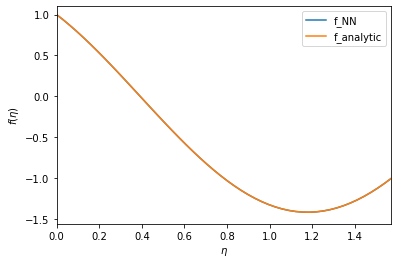

In [5]:
def f_analytic(x):
    f = np.cos(2*x) - np.sin(2*x)
    return f

import matplotlib.pyplot as plt
plt.plot(eta, f(params, eta), label='f_NN')
plt.plot(eta, f_analytic(eta), label='f_analytic')
plt.xlabel('$\eta$')
plt.ylabel('$f(\eta)$')
plt.legend(['f_NN', 'f_analytic'])
plt.xlim([0, np.pi/2])
plt.ylim(min(np.min(f(params, eta)), np.min(f_analytic(eta)))*1.1, max(np.max(f(params, eta)), np.max(f_analytic(eta)))*1.1)
plt.show()

In [12]:
print(type((f(params, 0.5))))
print(type(f_analytic(0.5)))

<class 'numpy.ndarray'>
<class 'numpy.float64'>
